# Repairing an audio signal

__Desired Learning Outcomes__:
* Being able to interpret the DFT of a "real-world" signal, and use the information as a basis for further signal processing.

**Prerequisites:**
* We wil be working with an audio file. Make sure you have headphones available

__Libraries and notebook-config:__

In [1]:
from numpy import sin, cos, pi, exp, mean, absolute, angle, conj # Sentrale matematiske funksjoner
from numpy.fft import fft, ifft             # DFT og IDFT
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"
from scipy.io import wavfile                # Lydfil I/O
from IPython.display import Audio           # For listening to processed audio

%matplotlib ipympl

**Manipulation of Audio Signal.**

We will now use Python to analyze an audio clip consisting of speech that is contaminated with a high-pitched beeping noise. The goal of this task is to remove the beeping noise from the audio signal by means of making adjustments to the signal composition in the frequency domain. The code cell below loads the audio signal as a numpy ndarray `xn` with floating-point values between -1.0 and 1.0. This is a list containing *all* the samples in the audio clip. Additionally, we also retrieve information about the sampling frequency of the audio clip in the variable `fs`.


You can load and play the audio by running the code cell below:

In [2]:
fs, data = wavfile.read(r'speech_w_tone.wav') 
xn = data/0x8000
Audio(xn, rate=fs)

## a)


Make use of what you have learned about Fourier transformation to identify the frequency of the beep tone. Here, you can use both code and graphical analysis depending on what is desired. Explain what you have done.

Potentially useful functions:

- [`max()`](https://docs.python.org/3/library/functions.html#max)
- [`np.absolute()`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)
- [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

*P.S. it is presumably not beneficial to produce a stem plot when working with signals of this size. The standard `plot()` function should be more suited to the task.* 

4391
879.9319295120555
-10722.705006679815


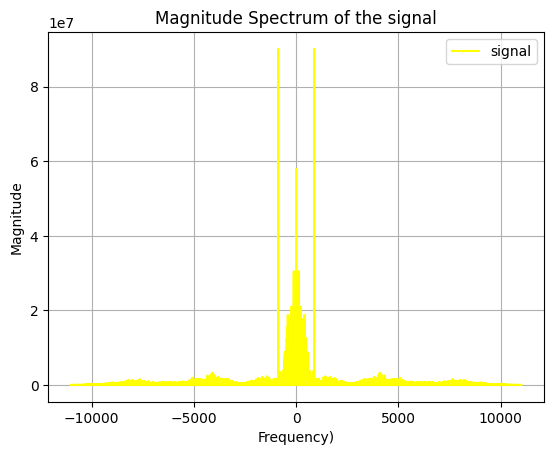

In [20]:
# WRITE YOUR CODE IN THIS CELL:
###############################
from numpy.fft import fft, ifft  

# https://dsp.stackexchange.com/questions/60045/how-do-i-find-the-peak-frequency-of-a-wav-file-in-python

import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"
from scipy.io import wavfile                # Lydfil I/O
from IPython.display import Audio     
from math import pi


T = 1 / fs
N = len(xn)
time = np.arange(0, N * T, T)


fFourT = fft(xn)

magnitude = np.abs(fFourT)

frequencies = np.fft.fftfreq(N, 1/fs)

phase = np.angle(fFourT)

#plt.plot(frequencies, magnitude, color='yellow', label='x(t) * cos(2 * np.pi * t)')

plt.plot(frequencies, magnitude, color='yellow', label='signal')

plt.xlabel("Frequency)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of the signal")
plt.grid(True)
plt.legend()

maxValIndex = np.argmax(magnitude)
minValIndex = np.argmin(magnitude)


print(maxValIndex)


print(f'The tone frequency: {frequencies[maxValIndex]}')

print(frequencies[minValIndex])


# https://stackoverflow.com/questions/9542738/find-a-value-in-a-list

 ##= [x for x in lst if fulfills_some_condition(x)]




ANSWER THEORY QUESTIONS HERE:

## b)
**Use Fourier transformation to remove the beeping tone from the audio signal.**  
_Hint: this will be most convenient to perform in the frequency domain. It should be fully possible to accomplish using the principles we have covered in problem 1 and 2._


Make modifications to the DFT-sequence $X[m]$ and use IFFT to construct a new array `yn` which should contain the speech signal which is no longer contaminated by the biiping tone. Provide an explanation for your code.


In [47]:
# WRITE YOUR CODE IN THIS CELL:
import numpy as np
#Use the np.where function?
#The numpy.where function is used to select elements from an array depending on a conditon
#noicelessSi numpy.Where(conditiongn, x, y)

#It is possible to use notch filter as well, which will work as a band-stop filter.
#https://www.geeksforgeeks.org/design-an-iir-notch-filter-to-denoise-signal-using-python/
#https://stackoverflow.com/questions/50247517/python-specific-frequency-removenotch-fil




beepFreq = 879.9319295120555


beepFreqIndex = maxValIndex



#fFourT = fft(xn)

print(f'{magnitude =}')
print(f'{fFourT =}')
print(f'{frequencies = }') 





# for-loop structure shown:
#https://stackoverflow.com/questions/59832655/python-how-to-make-a-list-out-of-all-the-indexes-with-a-certain-value-from-anoth



#Finding instances of the where the frequency is equal to the beep frequency
#with a treshhold margin of 1
indexes = [x for x in range(len(frequencies)) if abs(frequencies[x] - beepFreq) < 0.1]




print(f'{indexes = }')

instances = len(indexes)

print(f'{instances =}')



fFourT[indexes] = 0


yn = np.real(ifft(fFourT))




magnitude =array([1.78478041e+03, 1.86147352e+00, 9.11411533e-01, ...,
       7.01500254e-03, 9.13103486e-03, 1.46396901e-02])
fFourT =array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        , ..., -3.97772943-1.91953333j,
       -0.79770547-0.44083667j, -1.76618941+0.58792742j])
frequencies = array([0.00000000e+00, 2.00394427e-01, 4.00788854e-01, ...,
       1.10242986e+04, 1.10244990e+04, 1.10246994e+04])
indexes = [4391]
instances =1


ANSWER THEORY QUESTIONS HERE:

In [48]:
Audio(yn, rate=fs)